<a href="https://colab.research.google.com/github/Gan4x4/CV-HSE2019/blob/master/extra/Detetion_of_image_base_colors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import datasets, transforms
import numpy

transform = transforms.Compose([transforms.Lambda(lambda pil_im: numpy.array(pil_im))])
transform = None
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Extracting ./data/cifar-10-python.tar.gz to ./data


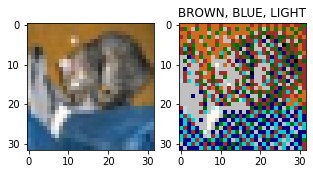

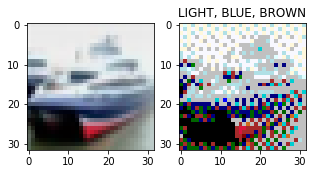

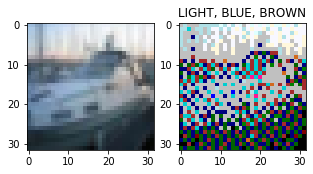

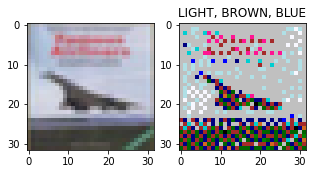

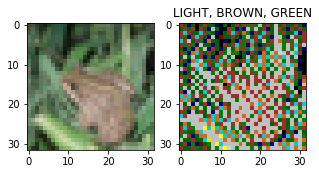

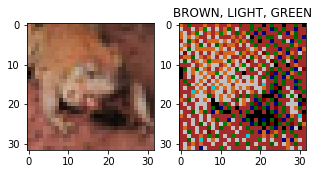

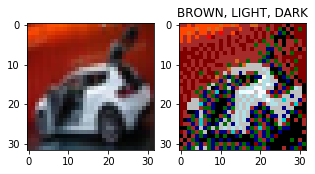

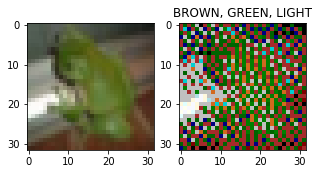

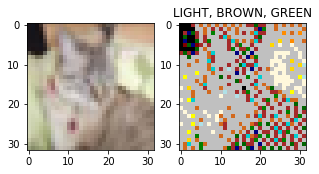

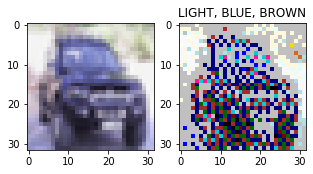

In [5]:
from PIL import Image
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

#https://en.wikipedia.org/wiki/Web_colors
class ColorDetector():
  COLORS = {
    'RED': [
            [255, 0,0],
            [220,  20,  60], #Crismon
            [255,  20, 147], #Deep pink
            ],
    'ORANGE': [
               [255,  69,   0], #Orange red
               [255, 140,   0], #Dark orange
            ],
    'BLUE': [
             [0,   0, 255],
             [0, 255, 255], #Aqua/Cyan
             [0, 206, 209], #DarkTurquoise
             [ 0,   0, 128] #Navy
            ],
    'GREEN': [
              [0, 128,   0],
              [0, 100,   0], #Dark green
              #[154, 205,  50], #Yellow green
              #[128, 128,   0] #Olive
            ],
    'YELLOW': [
               [255, 255 ,  0],
               [255, 215,   0], #Gold
    ],

    #'PURPLE': [
    #           [128,   0 ,128],
    #           [255,   0, 255], #Fuchsia
    #],

    'BROWN': [
              [165,  42,  42], #Brown
              [210, 105,  30], #Chocolate
              [128,   0,   0]  #Maroon
    ],
    'DARK': [
             [0, 0, 0],
             #[169, 169, 169], #Dim gray 

            ], 
    'LIGHT': [
              [255, 255, 255],
              [248, 248, 255], #GhostWhite
              [255, 255, 240], #Ivory
              [255, 248, 220], #Cornsilk
              [224, 255, 255], #LightCyan 
              [192, 192, 192], #Silver 
              [176, 224, 230], #PowderBlue
          ]
  }

  def __init__(self, pil_image):
    self.image = pil_image
    self.palimage = Image.new('P', (16, 16))
    self.palimage.putpalette(self.colors2vec())
    self.png = im_pil.quantize( method=0, kmeans=0, palette=self.palimage)
    self.px_count = im_pil.size[0]*im_pil.size[1]

  def colors2vec(self):
    out = []
    for l in ColorDetector.COLORS.values():
      out += [item for sublist in  l for item in sublist]
    vec2 = out*32
    return vec2[:256*3]
  
  def get_colors(self,im_pil):
    names = []
    tmp_png = self.png.copy()
    color_usage = np.array(tmp_png.getcolors())
    for key, cl in  ColorDetector.COLORS.items():
      pixels_count = 0
      for c in cl:
        c_ind = tmp_png.palette.getcolor(tuple(c))
        cu = color_usage[color_usage[:,1] == c_ind]
        if len(cu) > 0:
          pixels_count += cu[0][0]
      if pixels_count > 0:
        # pixel count to %
        names.append((key,pixels_count/self.px_count))
    names.sort(key=lambda tup: tup[1], reverse = True)
    return names

def show(pil, png,title = ""):
  plt.rcParams["figure.figsize"] = (5,5)
  fig = plt.figure()
  plt.axis('off')
  plt.subplot(1, 2, 1)
  plt.imshow(im_pil)
  plt.subplot(1, 2, 2)
  plt.imshow(png)
  plt.title(title)
  
for i in range(10):
  im_pil, cl_num = testset.__getitem__(i)
  cd = ColorDetector(im_pil)
  colors = cd.get_colors(im_pil)
  show(im_pil,cd.png,", ".join((colors[0][0],colors[1][0],colors[2][0])))
  


In [0]:
#Another approach
#https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/